   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.496932  -0.339122   0.229146  -0.182569  -1.041103   0.421546   
1   0.012499   1.007444   0.140096   2.868403  -2.123507  -1.280456   
2  -0.720212  -1.244486  -0.472291  -1.125655  -0.729670   1.010840   
3  -0.697364  -0.082698  -0.512911   1.138150   2.297500  -2.072355   
4  -0.202339  -1.553035  -0.090793  -0.183245   0.664007  -0.326614   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -1.015179   0.767666  -1.633819  -0.453981  ...    0.123134    0.977832   
1  -1.323388   1.420631  -2.725525  -1.325920  ...   -0.054783    1.852633   
2   0.733484   0.257335   0.028566  -1.091580  ...   -0.505305    0.411076   
3   2.256809  -1.697290   3.618918   0.993004  ...   -0.278493   -2.161010   
4   0.521091  -0.465061   0.939386   0.357189  ...   -0.026790   -0.599667   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    0.370061    0.266818  

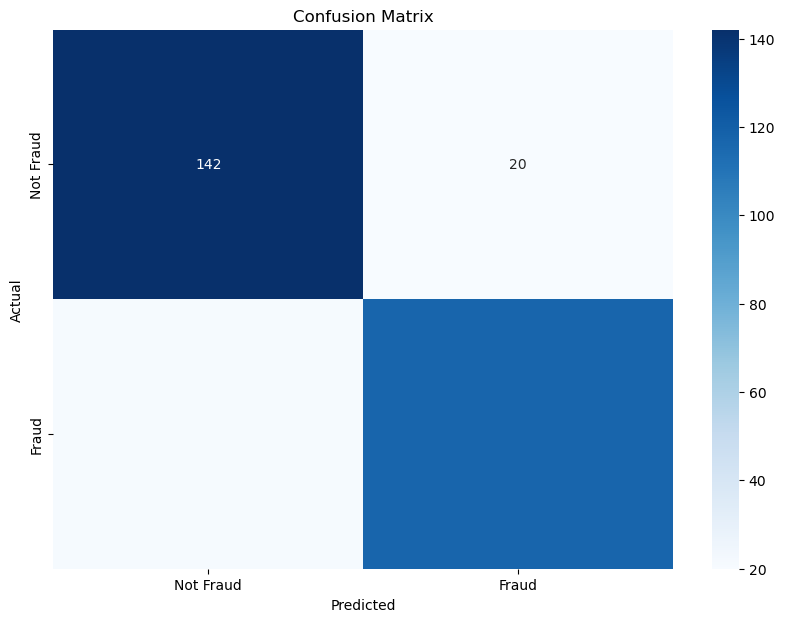

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=42)

# Convert to DataFrame for convenience
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['isFraud'] = y

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Preprocess the data
# Separate features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
